In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stroke_processed = pd.read_csv('processed_df.csv') # this is the processed DF (from Todd's .ipnb) saved to a csv file

In [3]:
stroke = stroke_processed.copy()
display(stroke.head())

non_indep_vars = [
    'stroke',  # this is the target
    'smoking_status_formerly smoked', # we've decided to drop smoking_status column
    'smoking_status_never smoked',
    'smoking_status_smokes'
]

indep_vars = stroke.drop(columns = non_indep_vars) # features
dep_var = stroke.stroke   # target

print('Features: ', list(indep_vars.columns))
print('Target:',  dep_var.name)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Features:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']
Target: stroke


#### Prepare oversample data

In [4]:
stroke_processed['stroke'].value_counts()

0    4857
1     249
Name: stroke, dtype: int64

In [4]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(sampling_strategy = 0.3, random_state = 41)
X_ovr, y_ovr = oversampler.fit_resample(indep_vars, dep_var)
print(X_ovr.shape)
print(y_ovr.shape)

# split and scale data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ovr, y_ovr, test_size=0.3, random_state=41)

print('Train data stroke count')
display(y_train.value_counts())
print('Test data stroke count')
display(y_test.value_counts())


(6314, 12)
(6314,)
Train data stroke count


0    3390
1    1029
Name: stroke, dtype: int64

Test data stroke count


0    1467
1     428
Name: stroke, dtype: int64

#### Logistic Regression

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pl_clf = Pipeline([
    ( 'scaler', StandardScaler() ), # put scaler here in case we want to tune scaler hyper param later
    ( 'classifier', LogisticRegression() )
])

# GridSearchCV
hyperparams = { 
    'classifier__C': np.linspace(0.0001, 0.01, 50),
    'classifier__max_iter': range(80, 111)
}

gridsearch = GridSearchCV(pl_clf,  hyperparams, n_jobs = -1)

# train model
_ = gridsearch.fit(X_train, y_train)

In [6]:
# predict
y_pred = gridsearch.predict(X_test)

# best co-efficient
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8166969863126015
{'classifier__C': 0.01, 'classifier__max_iter': 80}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1467
           1       0.71      0.38      0.49       428

    accuracy                           0.82      1895
   macro avg       0.77      0.67      0.69      1895
weighted avg       0.81      0.82      0.80      1895

1400 67 267 161
[161, 67]
[267, 1400]


Text(0.5, 1.0, 'Logistic Regression')

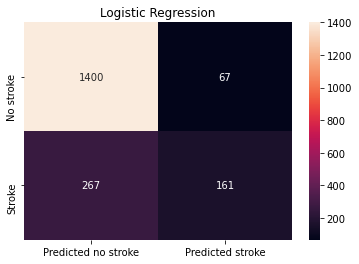

In [7]:
# Evaluation metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2',xticklabels=['Predicted no stroke', 'Predicted stroke'],yticklabels = ['No stroke', 'Stroke'])
ax.set_title('Logistic Regression')

#### KNN

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pl_clf = Pipeline([
    ( 'scaler', StandardScaler() ), # put scaler here in case we want to tune scaler hyper param later
    ( 'classifier', KNeighborsClassifier() )
])

# GridSearchCV
hyperparams = { 
    'classifier__n_neighbors': range(3, 11),
}

gridsearch = GridSearchCV(pl_clf,  hyperparams, n_jobs = -1)

# train model
_ = gridsearch.fit(X_train, y_train)

In [9]:
# predict
y_pred = gridsearch.predict(X_test)

# best co-efficient
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8630888630388996
{'classifier__n_neighbors': 3}


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1467
           1       0.69      0.71      0.70       428

    accuracy                           0.86      1895
   macro avg       0.80      0.81      0.81      1895
weighted avg       0.87      0.86      0.86      1895

1333 134 124 304
[304, 134]
[124, 1333]


Text(0.5, 1.0, 'KNN')

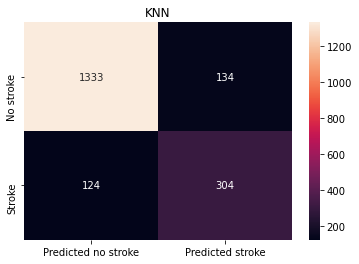

In [10]:
# Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2',xticklabels=['Predicted no stroke', 'Predicted stroke'],yticklabels = ['No stroke', 'Stroke'])
ax.set_title('KNN')

#### Decision Tree

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pl_clf = Pipeline([
    ( 'scaler', StandardScaler() ), # put scaler here in case we want to tune scaler hyper param later
    ( 'classifier', DecisionTreeClassifier() )
])

# GridSearchCV
hyperparams = { 
    'classifier__max_depth': range(3, 16),
    'classifier__max_leaf_nodes': range(55, 66),
}

gridsearch = GridSearchCV(pl_clf,  hyperparams, n_jobs = -1)

# train model
_ = gridsearch.fit(X_train, y_train)

In [12]:
# predict
y_pred = gridsearch.predict(X_test)

# best co-efficient
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.8959050542422735
{'classifier__max_depth': 14, 'classifier__max_leaf_nodes': 65}


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1467
           1       0.77      0.72      0.74       428

    accuracy                           0.89      1895
   macro avg       0.84      0.83      0.84      1895
weighted avg       0.89      0.89      0.89      1895

1374 93 120 308
[308, 93]
[120, 1374]


Text(0.5, 1.0, 'Decision Tree')

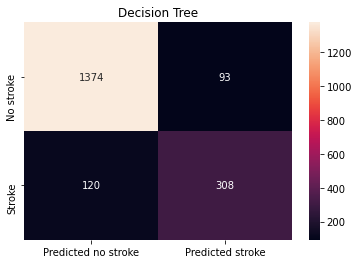

In [13]:
# Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2',xticklabels=['Predicted no stroke', 'Predicted stroke'],yticklabels = ['No stroke', 'Stroke'],ax=ax)
ax.set_title('Decision Tree')

In [14]:
print(gridsearch.best_estimator_.named_steps['classifier'].get_depth())
print(gridsearch.best_estimator_.named_steps['classifier'].get_n_leaves())

13
65


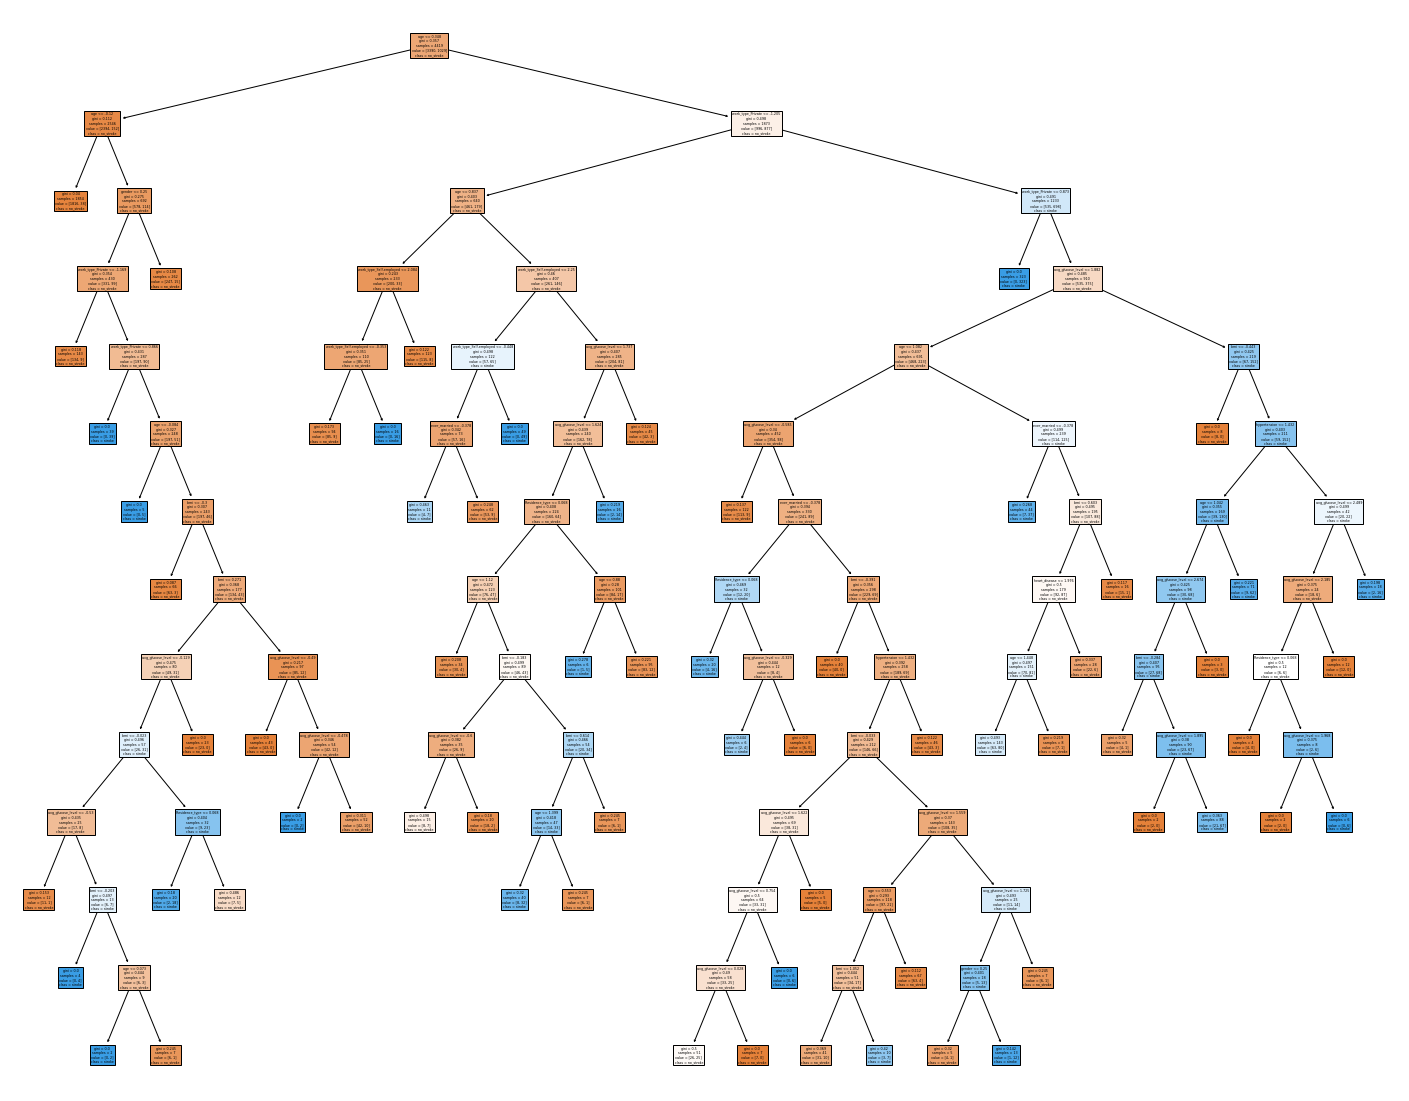

In [15]:
from sklearn import tree
plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    gridsearch.best_estimator_.named_steps['classifier'],
    feature_names = indep_vars.columns,
    class_names = ['no_stroke', 'stroke'],
    filled = True
)